In [1]:
import logging

import graphcat.notebook

logging.basicConfig(level=logging.DEBUG)

In [2]:
graph = graphcat.Graph()

graph.set_task("a", graphcat.constant(1))
graph.set_task("b", graphcat.constant(2))
graph.set_task("choice", graphcat.constant(True))
graph.set_expression("expr", "3 + 4")
graphcat.notebook.display(graph)
print("Output:", graph.output("expr"))
graphcat.notebook.display(graph)

Output: 7


In [3]:
def out(graph):
    def implementation(label):
        if label not in graph:
            raise ValueError(f"No task named {label!r}.")
        return graph.output(label)
    return implementation

locals = {"out": out(graph)}

Output: 1


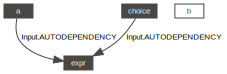

In [4]:
graph.set_expression("expr", "out('a') if out('choice') else out('b')", locals)
graphcat.notebook.display(graph)
print("Output:", graph.output("expr"))
graphcat.notebook.display(graph)

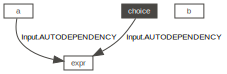

Output: 3


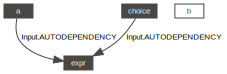

In [5]:
graph.set_task("a", graphcat.constant(3))
graphcat.notebook.display(graph)
print("Output:", graph.output("expr"))
graphcat.notebook.display(graph)

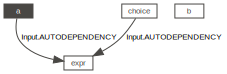

Output: 2


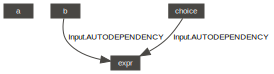

In [6]:
graph.set_task("choice", graphcat.constant(False))
graphcat.notebook.display(graph)
print("Output:", graph.output("expr"))
graphcat.notebook.display(graph)

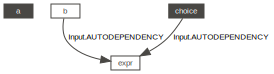

Output: 4


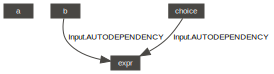

In [7]:
graph.set_task("b", graphcat.constant(4))
graphcat.notebook.display(graph)
print("Output:", graph.output("expr"))
graphcat.notebook.display(graph)

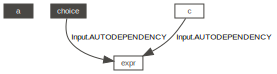

RuntimeError: Uncaught exception executing expression "out('a') if out('choice') else out('b')": No task named 'b'.

In [8]:
graph.move_task("b", "c")
graphcat.notebook.display(graph)
print("Output:", graph.output("expr"))

In [9]:
graphcat.notebook.display(graph)

Output: 4


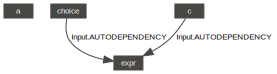

In [11]:
graph.set_expression("expr", "out('a') if out('choice') else out('c')", locals)
graphcat.notebook.display(graph)
print("Output:", graph.output("expr"))
graphcat.notebook.display(graph)